Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.shape

(8219, 4)

Rows = 8219, Columns = 4

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df  = gdp_df.drop(columns = 'Value Footnotes')

In [10]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [11]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})

In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [13]:
country_count = gdp_df.Country.value_counts().to_frame().reset_index()

In [14]:
country_count.loc[country_count['count'] == 34]

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
223,Turkmenistan,34
224,Timor-Leste,34
225,Togo,34
226,Trinidad and Tobago,34


In [15]:
country_count.loc[country_count['count'] <= 20]

,Country,count
241,Cayman Islands,18
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13
246,Djibouti,11


In [16]:
gdp_df['Year'].value_counts()

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

All countries in the database have GDP_Per_Capital data starting in 2015.

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [17]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020)]

In [18]:
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


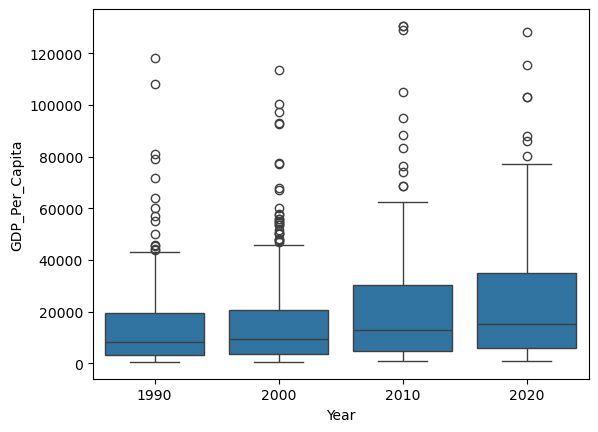

In [19]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

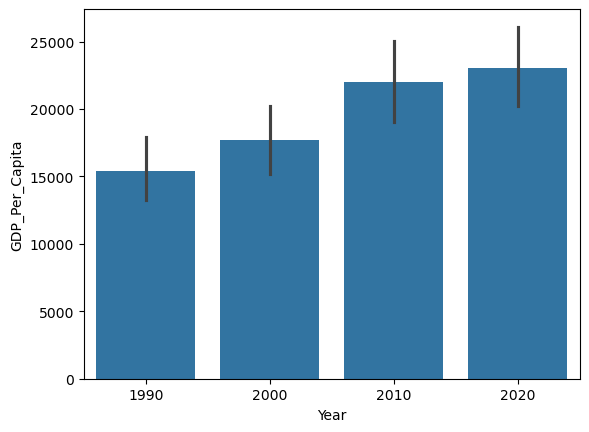

In [20]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

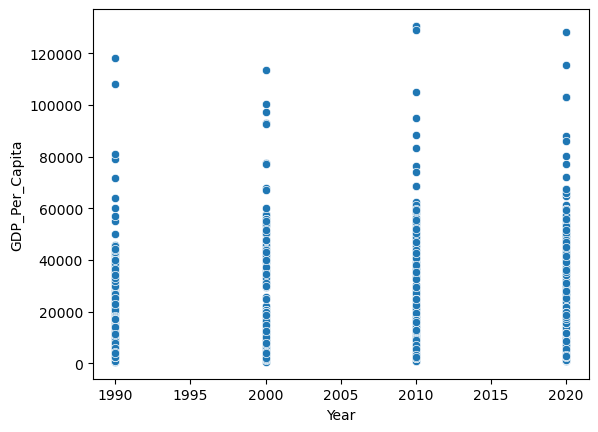

In [21]:
sns.scatterplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

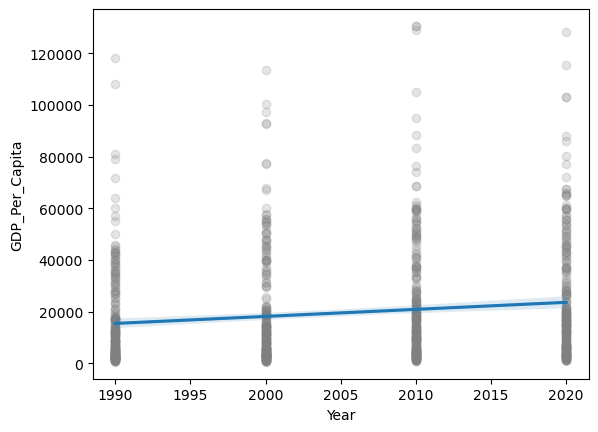

In [22]:
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita',
            scatter_kws = {'color' : 'grey', 'alpha' : 0.2})

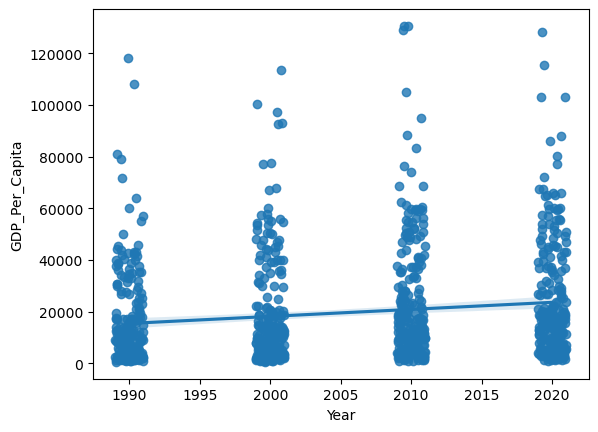

In [23]:
sns.regplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita', x_jitter = True);

Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [25]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]

In [26]:
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [27]:
top_country = gdp_2020.sort_values('GDP_Per_Capita', ascending = False).Country.head(1)

In [28]:
top_over_time = gdp_df.loc[gdp_df.Country.isin(top_country)]

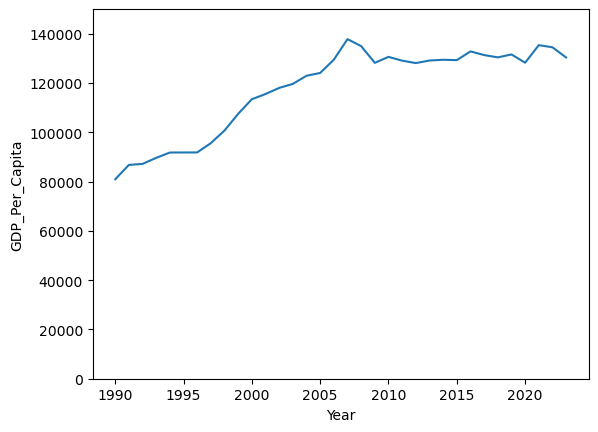

In [29]:
sns.lineplot(data = top_over_time, x='Year', y='GDP_Per_Capita')
plt.ylim(bottom = 0, top = 150000);

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

 **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [30]:
lowest_gdp = gdp_2020.sort_values('GDP_Per_Capita').Country.head(1)

In [31]:
lowest_over_time = gdp_df.loc[gdp_df.Country.isin(lowest_gdp)]

(0.0, 1466.1674858591664)

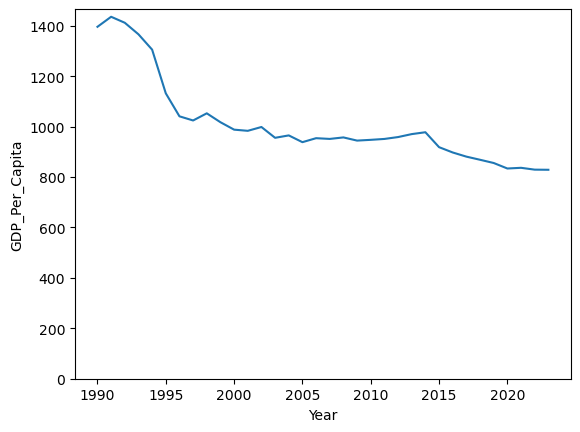

In [32]:
sns.lineplot(data = lowest_over_time, x='Year', y='GDP_Per_Capita')
plt.ylim(bottom = 0)

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [50]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [51]:
internet_df  = internet_df.drop(columns = 'Value Footnotes')

In [52]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [53]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})

In [54]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


For how many countries was the percentage of internet users below 5% in 2014?

In [55]:
internet_2014 = internet_df.loc[internet_df.Year == 2014]

In [57]:
len(internet_2014.loc[internet_2014.Internet_Users_Pct < 5])/len(internet_2014)*100

4.901960784313726

In [58]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'])

In [59]:
internet_2014.sort_values('Internet_Users_Pct', ascending = False).Country

2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
4173                         Norway
1546                        Denmark
                   ...             
5116                    South Sudan
5055                        Somalia
4073                          Niger
873                         Burundi
1782                        Eritrea
Name: Country, Length: 204, dtype: object